In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
from PIL import Image

processed_dir = "./processed_data/"



In [139]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
from PIL import Image

processed_dir = "./processed_data/"
img_size = (224,224)


train_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.GaussianBlur(3),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.5, 0.5, 0.5],
    std=[0.5, 0.5, 0.5]), 
])

test_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.5, 0.5, 0.5],
    std=[0.5, 0.5, 0.5]), 
])

train_dataset = ImageFolder(root = "./processed_data/train/", transform = train_transform)
test_dataset = ImageFolder(root = "./processed_data/test/", transform = test_transform)
train_dataset.samples

[('./processed_data/train/no/1 no.jpeg', 0),
 ('./processed_data/train/no/10 no.jpg', 0),
 ('./processed_data/train/no/11 no.jpg', 0),
 ('./processed_data/train/no/13 no.jpg', 0),
 ('./processed_data/train/no/14 no.jpg', 0),
 ('./processed_data/train/no/15 no.jpg', 0),
 ('./processed_data/train/no/17 no.jpg', 0),
 ('./processed_data/train/no/18 no.jpg', 0),
 ('./processed_data/train/no/21 no.jpg', 0),
 ('./processed_data/train/no/22 no.jpg', 0),
 ('./processed_data/train/no/23 no.jpg', 0),
 ('./processed_data/train/no/24 no.jpg', 0),
 ('./processed_data/train/no/25 no.jpg', 0),
 ('./processed_data/train/no/26 no.jpg', 0),
 ('./processed_data/train/no/28 no.jpg', 0),
 ('./processed_data/train/no/29 no.jpg', 0),
 ('./processed_data/train/no/3 no.jpg', 0),
 ('./processed_data/train/no/31 no.jpg', 0),
 ('./processed_data/train/no/32 no.jpg', 0),
 ('./processed_data/train/no/33 no.jpg', 0),
 ('./processed_data/train/no/34 no.jpg', 0),
 ('./processed_data/train/no/35 no.jpg', 0),
 ('./proces

In [140]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [141]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models


class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 56 * 56)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return x


model = SimpleCNN(num_classes=2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-4)

In [142]:
num_epochs = 50
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
        
        running_loss += loss.item()
    
    train_accuracy.append(100 * correct_train / total_train)
    
    # Testing phase
    model.eval()  # Set model to evaluation mode
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted_test = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted_test == labels).sum().item()
    
    test_accuracy.append(100 * correct_test / total_test)
    
    # Print training and testing accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Accuracy: {train_accuracy[-1]:.2f}%, Test Accuracy: {test_accuracy[-1]:.2f}%')


Epoch [1/50], Train Accuracy: 61.69%, Test Accuracy: 43.06%
Epoch [2/50], Train Accuracy: 61.69%, Test Accuracy: 43.06%
Epoch [3/50], Train Accuracy: 61.69%, Test Accuracy: 43.06%
Epoch [4/50], Train Accuracy: 61.69%, Test Accuracy: 43.06%
Epoch [5/50], Train Accuracy: 61.69%, Test Accuracy: 43.06%
Epoch [6/50], Train Accuracy: 61.69%, Test Accuracy: 43.06%
Epoch [7/50], Train Accuracy: 61.69%, Test Accuracy: 43.06%
Epoch [8/50], Train Accuracy: 61.69%, Test Accuracy: 43.06%
Epoch [9/50], Train Accuracy: 62.69%, Test Accuracy: 45.83%
Epoch [10/50], Train Accuracy: 69.65%, Test Accuracy: 52.78%
Epoch [11/50], Train Accuracy: 69.15%, Test Accuracy: 51.39%
Epoch [12/50], Train Accuracy: 70.65%, Test Accuracy: 47.22%
Epoch [13/50], Train Accuracy: 72.14%, Test Accuracy: 56.94%
Epoch [14/50], Train Accuracy: 75.12%, Test Accuracy: 58.33%
Epoch [15/50], Train Accuracy: 72.14%, Test Accuracy: 58.33%
Epoch [16/50], Train Accuracy: 74.63%, Test Accuracy: 58.33%
Epoch [17/50], Train Accuracy: 69

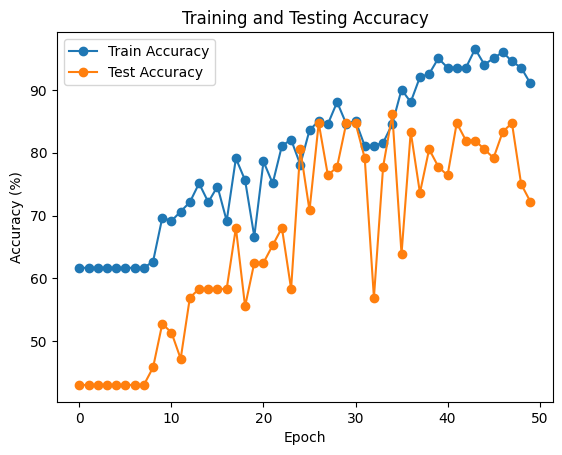

Final Accuracy on Test Set: 72.22%


66.22222222222221

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training and testing accuracy
plt.plot(train_accuracy, label='Train Accuracy', marker = 'o')
plt.plot(test_accuracy, label='Test Accuracy', marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

# Report final accuracy on test set
print(f'Final Accuracy on Test Set: {test_accuracy[-1]:.2f}%')
np.mean(test_accuracy)

<Figure size 800x600 with 0 Axes>

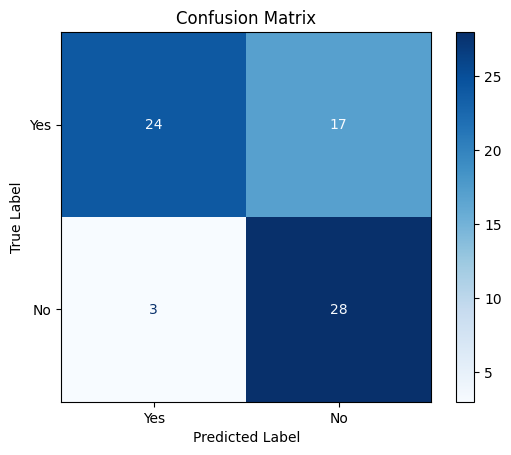

In [144]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.eval()

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Make predictions on the dataset
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())
        
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix, display_labels=['Yes', 'No']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [130]:
# Load pre-trained VGG model
vgg_model = models.vgg19(pretrained=True)

# Freeze parameters of pre-trained layers
for param in vgg_model.parameters():
    param.requires_grad = False

# Modify classifier for binary classification
num_features = vgg_model.classifier[6].in_features
vgg_model.classifier[6] = nn.Linear(num_features, 2)  # Output layer for binary classification

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg_model.parameters(), lr=0.001, weight_decay=1e-4)

/home/frankburkhart/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/frankburkhart/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [131]:
num_epochs = 50
train_accuracy = []
test_accuracy = []

model = vgg_model

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Calculate training accuracy
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
        
        running_loss += loss.item()
    
    train_accuracy.append(100 * correct_train / total_train)
    
    # Testing phase
    model.eval()  # Set model to evaluation mode
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted_test = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted_test == labels).sum().item()
    
    test_accuracy.append(100 * correct_test / total_test)
    
    # Print training and testing accuracy
    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Accuracy: {train_accuracy[-1]:.2f}%, Test Accuracy: {test_accuracy[-1]:.2f}%')


Epoch [1/50], Train Accuracy: 60.70%, Test Accuracy: 73.61%
Epoch [2/50], Train Accuracy: 73.13%, Test Accuracy: 58.33%
Epoch [3/50], Train Accuracy: 76.12%, Test Accuracy: 76.39%
Epoch [4/50], Train Accuracy: 80.60%, Test Accuracy: 66.67%
Epoch [5/50], Train Accuracy: 82.09%, Test Accuracy: 72.22%
Epoch [6/50], Train Accuracy: 82.59%, Test Accuracy: 69.44%
Epoch [7/50], Train Accuracy: 82.09%, Test Accuracy: 70.83%
Epoch [8/50], Train Accuracy: 81.59%, Test Accuracy: 75.00%
Epoch [9/50], Train Accuracy: 81.09%, Test Accuracy: 75.00%
Epoch [10/50], Train Accuracy: 83.08%, Test Accuracy: 75.00%
Epoch [11/50], Train Accuracy: 85.57%, Test Accuracy: 72.22%
Epoch [12/50], Train Accuracy: 87.56%, Test Accuracy: 79.17%
Epoch [13/50], Train Accuracy: 86.57%, Test Accuracy: 77.78%
Epoch [14/50], Train Accuracy: 85.57%, Test Accuracy: 73.61%
Epoch [15/50], Train Accuracy: 85.57%, Test Accuracy: 73.61%
Epoch [16/50], Train Accuracy: 83.08%, Test Accuracy: 77.78%
Epoch [17/50], Train Accuracy: 90

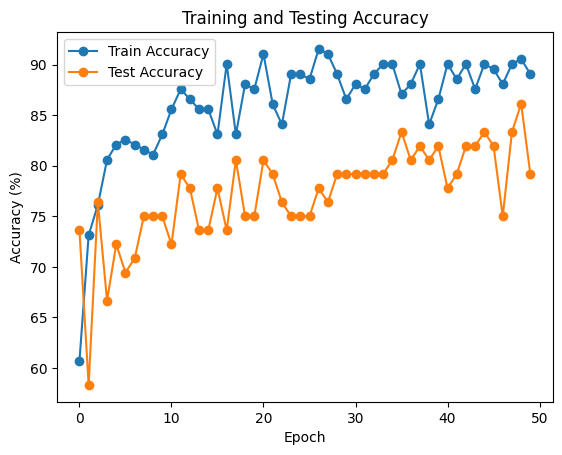

Final Accuracy on Test Set: 79.17%


In [132]:
# Plot training and testing accuracy
plt.plot(train_accuracy, label='Train Accuracy', marker = "o")
plt.plot(test_accuracy, label='Test Accuracy', marker = "o")
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

# Report final accuracy on test set
print(f'Final Accuracy on Test Set: {test_accuracy[-1]:.2f}%')

<Figure size 800x600 with 0 Axes>

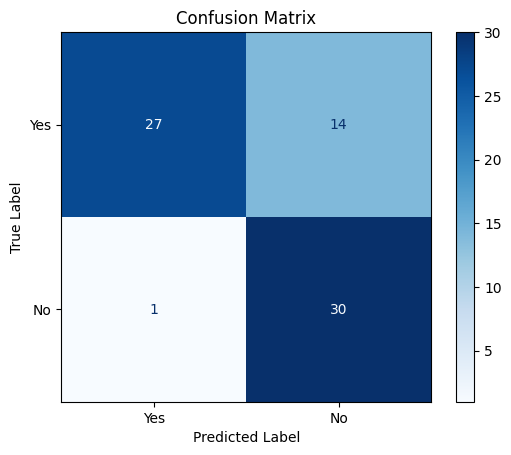

In [133]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.eval()

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Make predictions on the dataset
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())
        
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix, display_labels=['Yes', 'No']).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [134]:
np.mean(test_accuracy)

77.19444444444444

In [114]:
def evaluate_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy
evaluate_model(model, test_loader)

75.0